<a href="https://colab.research.google.com/github/L-lovat/NeuromatchProject/blob/main/Kopie_von_ProjectECoG_faceshouses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading of Miller ECoG data of faces/houses (+ noise)

includes some visualizations

**Importing everything**

In [1]:
import os, requests
!pip install nilearn --quiet
!pip install nimare --quiet

from matplotlib import rcParams
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from collections import Counter
from nilearn import plotting
from nimare import utils
from scipy import signal
import numpy as np
from scipy.stats import wilcoxon
from scipy.stats import ttest_ind
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] = 15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 2.7 MB/s eta 0:00:00


In [2]:
# @title Data retrieval

fname = 'faceshouses.npz'
url = "https://osf.io/argh7/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [3]:
# @title Data loading

alldat = np.load(fname, allow_pickle=True)['dat']

# select just one of the recordings here.
dat1 = alldat[1][0]
dat2 = alldat[0][1]
print(dat2["scale_uv"].flatten())



[ 96.57301141  88.47772548  68.43378027 107.37489964  98.66283032
  79.18090231  81.89916915  74.74611847  78.29601884 105.45396581
  83.24744239  78.4611479   63.8470355   69.12118885  47.23918007
  70.74653604  87.06067327  50.88587429  64.81228754  52.63433327
  95.28296346 107.62810204  49.47419752  60.57269937  56.82143675
  63.37205674  55.42088395  55.18656365  71.27204825  59.25633059
  70.46725468  77.5253111   83.21912822  73.39216771  51.2485543
  48.77969045  71.84131669  90.66683494  90.03421388 104.21461651
  28.1310317 ]


In [28]:
N_subj, N_exp = alldat.shape
print(N_subj, N_exp)
subjects1 = []
subjects2 = []
for subj in range(N_subj):
  subjects1.append(alldat[subj, 0])
  subjects2.append(alldat[subj, 1])
  print(f"subject {subj} has {alldat[subj, 0].get('locs').shape[0]} electrodes implented")

i=0
for subject in subjects1:
  print(i)
  for key in subject.keys():
    ln = len(subject[key]) if type(subject[key]) == type([]) else None
    ln = subject[key].shape if ln is None and type(subject[key]) == type(np.array([])) else ln
    print(f"\t{key} : {type(subject[key])} - {ln}")
  i += 1

i=0
for subject in subjects2:
  print(i)
  for key in subject.keys():
    ln = len(subject[key]) if type(subject[key]) == type([]) else None
    ln = subject[key].shape if ln is None and type(subject[key]) == type(np.array([])) else ln
    print(f"\t{key} : {type(subject[key])} - {ln}")
  i += 1
  #print(subject['stim_noise'])

  print(Counter(subject['stim_noise'].flatten()))
  print(subject['t_on'][:20])

7 2
subject 0 has 41 electrodes implented
subject 1 has 50 electrodes implented
subject 2 has 39 electrodes implented
subject 3 has 60 electrodes implented
subject 4 has 58 electrodes implented
subject 5 has 39 electrodes implented
subject 6 has 58 electrodes implented
0
	t_off : <class 'numpy.ndarray'> - (300,)
	stim_id : <class 'numpy.ndarray'> - (300,)
	t_on : <class 'numpy.ndarray'> - (300,)
	srate : <class 'numpy.ndarray'> - (1, 1)
	V : <class 'numpy.ndarray'> - (268400, 41)
	scale_uv : <class 'numpy.ndarray'> - (41,)
	locs : <class 'numpy.ndarray'> - (41, 3)
	hemisphere : <class 'list'> - 41
	lobe : <class 'list'> - 41
	gyrus : <class 'list'> - 41
	Brodmann_Area : <class 'list'> - 41
1
	t_off : <class 'numpy.ndarray'> - (300,)
	stim_id : <class 'numpy.ndarray'> - (300,)
	t_on : <class 'numpy.ndarray'> - (300,)
	srate : <class 'numpy.ndarray'> - (1, 1)
	V : <class 'numpy.ndarray'> - (271360, 50)
	scale_uv : <class 'numpy.ndarray'> - (50,)
	locs : <class 'numpy.ndarray'> - (50, 3)


0, Counter({'Brodmann area 19': 5, 'Brodmann area 37': 4, 'Brodmann area 20': 3, 'Brodmann area 28': 3, 'Brodmann area 18': 3, 'Brodmann area 10': 2, 'Brodmann area 32': 2, 'Corpus Callosum': 2, 'Amygdala': 2, 'Brodmann area 47': 2, 'Brodmann area 34': 2, 'Brodmann area 38': 2, 'Brodmann area 21': 2, 'Brodmann area 30': 2, 'Brodmann area 36': 2, 'Brodmann area 13': 1, 'Hippocampus': 1, 'Brodmann area 22': 1})
1, Counter({'Brodmann area 11': 15, 'Brodmann area 38': 7, 'Brodmann area 20': 6, 'Brodmann area 10': 4, 'Brodmann area 46': 3, 'Brodmann area 28': 3, 'Brodmann area 18': 3, 'Brodmann area 37': 3, 'Brodmann area 47': 2, 'Brodmann area 19': 2, 'Brodmann area 35': 1, 'Brodmann area 36': 1})
2, Counter({'Brodmann area 22': 11, 'Dentate': 8, 'Brodmann area 40': 5, 'Brodmann area 11': 4, 'Brodmann area 47': 3, 'Brodmann area 28': 2, 'Brodmann area 43': 2, 'Brodmann area 38': 1, 'Brodmann area 36': 1, 'Brodmann area 37': 1, 'Brodmann area 20': 1})
3, Counter({'Caudate Head': 23, 'Brodma

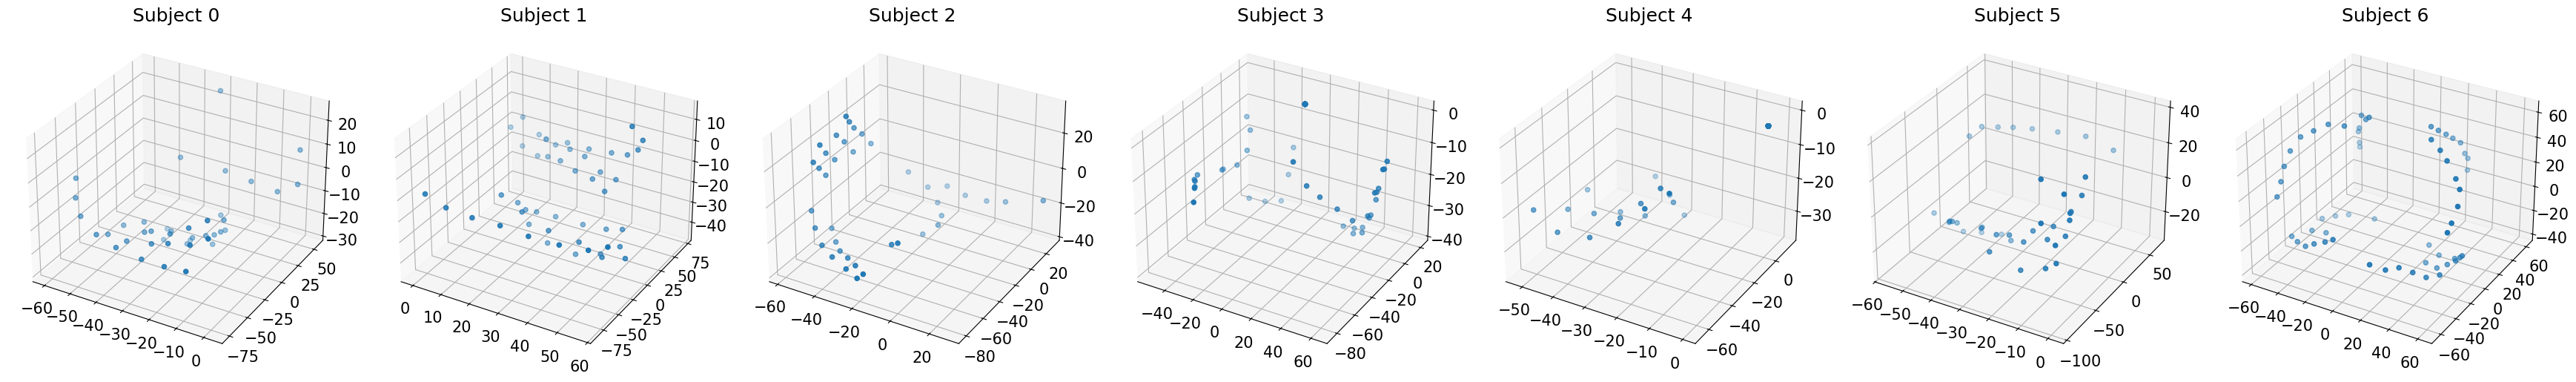

In [5]:



fig = plt.figure(figsize=(5 * len(subjects1), 5))  # Adjust the size as needed

for i, subject in enumerate(subjects1):
    counts = Counter(subject["Brodmann_Area"])
    print(f"{i}, {counts}")
    ax = fig.add_subplot(1, len(subjects1), i + 1, projection='3d')
    ax.scatter(subject["locs"][:, 0], subject["locs"][:, 1], subject["locs"][:, 2])
    ax.set_title(f"Subject {i}")

plt.tight_layout()
plt.show()


0, Counter({'Brodmann area 19': 5, 'Brodmann area 37': 4, 'Brodmann area 20': 3, 'Brodmann area 28': 3, 'Brodmann area 18': 3, 'Brodmann area 10': 2, 'Brodmann area 32': 2, 'Corpus Callosum': 2, 'Amygdala': 2, 'Brodmann area 47': 2, 'Brodmann area 34': 2, 'Brodmann area 38': 2, 'Brodmann area 21': 2, 'Brodmann area 30': 2, 'Brodmann area 36': 2, 'Brodmann area 13': 1, 'Hippocampus': 1, 'Brodmann area 22': 1})
1, Counter({'Brodmann area 11': 15, 'Brodmann area 38': 7, 'Brodmann area 20': 6, 'Brodmann area 10': 4, 'Brodmann area 46': 3, 'Brodmann area 28': 3, 'Brodmann area 18': 3, 'Brodmann area 37': 3, 'Brodmann area 47': 2, 'Brodmann area 19': 2, 'Brodmann area 35': 1, 'Brodmann area 36': 1})
2, Counter({'Brodmann area 22': 11, 'Dentate': 8, 'Brodmann area 40': 5, 'Brodmann area 11': 4, 'Brodmann area 47': 3, 'Brodmann area 28': 2, 'Brodmann area 43': 2, 'Brodmann area 38': 1, 'Brodmann area 36': 1, 'Brodmann area 37': 1, 'Brodmann area 20': 1})
3, Counter({'Caudate Head': 23, 'Brodma

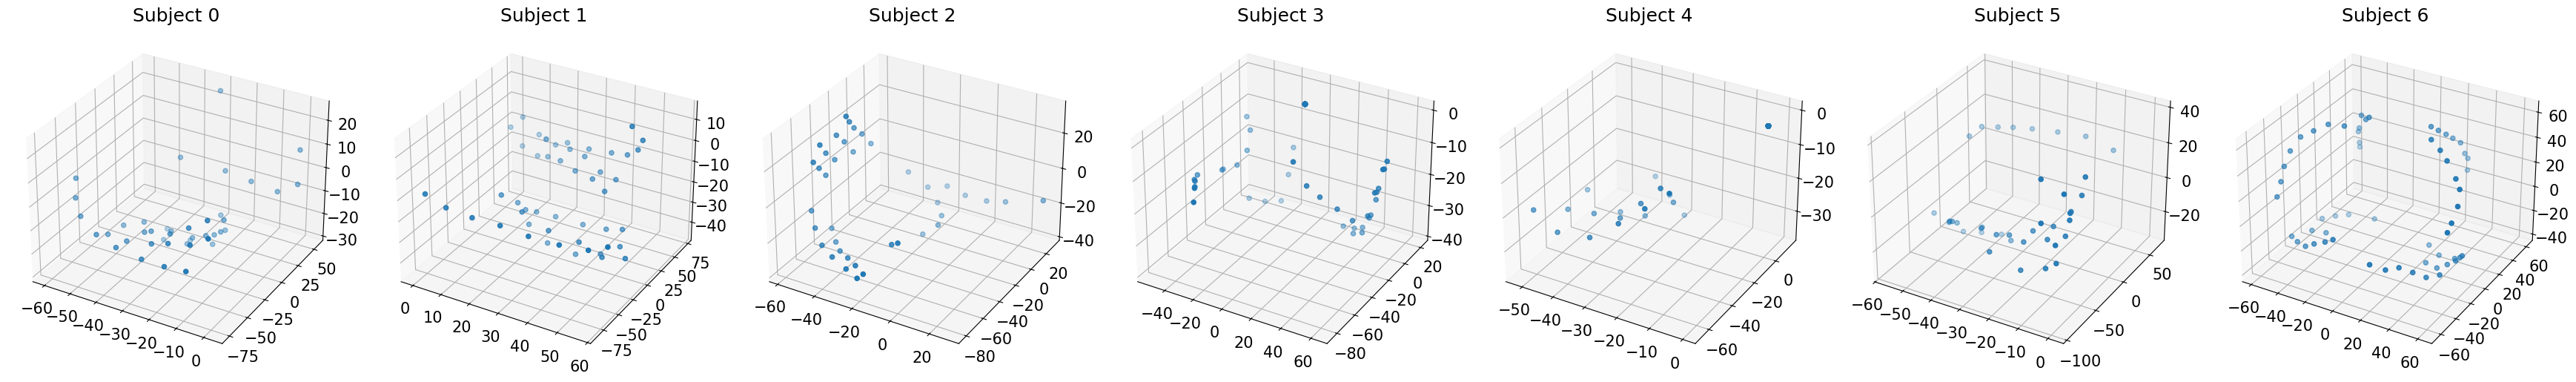

In [6]:
fig = plt.figure(figsize=(5 * len(subjects1), 5))  # Adjust the size as needed

for i, subject in enumerate(subjects2):
    counts = Counter(subject["Brodmann_Area"])
    print(f"{i}, {counts}")
    ax = fig.add_subplot(1, len(subjects1), i + 1, projection='3d')
    ax.scatter(subject["locs"][:, 0], subject["locs"][:, 1], subject["locs"][:, 2])
    ax.set_title(f"Subject {i}")

plt.tight_layout()
plt.show()

# Dataset info #

This is one of multiple ECoG datasets from Miller 2019, recorded in a clinical settings with a variety of tasks. We plan to curate a few more before NMA starts. Raw data here:

https://exhibits.stanford.edu/data/catalog/zk881ps0522

`alldat` contains 7 subjects each with two sessions `dat1` and `dat2`, and was originally used in these publications:

*Miller, Kai J., et al. "Face percept formation in human ventral temporal cortex." Journal of neurophysiology 118.5 (2017): 2614-2627.*

*Miller, Kai J., et al. "The physiology of perception in human temporal lobe is specialized for contextual novelty." Journal of neurophysiology 114.1 (2015): 256-263.*

*Miller, Kai J., et al. "Spontaneous decoding of the timing and content of human object perception from cortical surface recordings reveals complementary information in the event-related potential and broadband spectral change." PLoS computational biology 12.1 (2016): e1004660.*

*Miller, Kai J., et al. "The physiology of perception in human temporal lobe is specialized for contextual novelty." Journal of neurophysiology 114.1 (2015): 256-263.*

*Miller, Kai J., et al. "Spontaneous decoding of the timing and content of human object perception from cortical surface recordings reveals complementary information in the event-related potential and broadband spectral change." PLoS computational biology 12.1 (2016): e1004660.*

In this task, subjects in a clinical settings (with ECoG implants) are passively shown faces and house during the first experiment (`dat1`). Then in the second experiment in the same subjects (`dat2`), noise is added to face and houses images and the subject has to detect the faces by pressing a key. Two of the subjects don't have keypresses.

Sample rate is always 1000Hz, and the ECoG data has been notch-filtered at 60, 120, 180, 240 and 250Hz, followed by z-scoring across time and conversion to float16 to minimize size.

Experiment 1:
* `dat1['V']`: continuous voltage data (time by channels)
* `dat1['srate']`: acquisition rate (1000 Hz). All stimulus times are in units of this.  
* `dat1['t_on']`: time of stimulus onset in data samples
* `dat1['t_off']`: time of stimulus offset, always 400 samples after `t_on`
* `dat1['stim_id`]: identity of stimulus from 1-100, with 1-50 being houses and 51-100 being faces
* `dat1['locs`]: 3D electrode positions on the brain surface

Experiment 2:
* `dat2['V`]: continuous voltage data (time by channels)
* `dat2['srate']`: acquisition rate (1000 Hz). All stimulus times are in units of this.  
* `dat2['t_on']`: time of stimulus onset in data samples
* `dat2['t_off']`: time of stimulus offset, always 1000 samples after `t_on`, with no inter-stimulus interval
* `dat2['stim_id`]: identity of stimulus from 1-600 (not really useful, since we don't know which ones are the same house/face)
* `dat2['stim_cat']`: stimulus category (1 = house, 2 = face)
* `dat2['stim_noise']`: percent noise from 0 to 100
* `dat2['key_press']`: when the subject thought the image was a face
* `dat2['categories']`: categories legend (1 = house, 2 = face)
* `dat2['locs`]: 3D electrode positions on the brain surface


In [7]:
#example of one subject
for i in range(len(subjects1)):
  subject1 = subjects1[i]['locs']
  subject2 = subjects2[i]['locs']
  print(subject1==subject2)
plt.figure(figsize=(8, 8))
locs = subject["locs"]
view = plotting.view_markers(utils.tal2mni(locs),
                            marker_labels=['%d'%k for k in np.arange(locs.shape[0])],
                            marker_color='purple',
                            marker_size=5)
view

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  Tru

<Figure size 800x800 with 0 Axes>

In [10]:
def plot_fft(V, fs=1000, title=""):
    # Compute the frequency spectrum
    N = len(V)
    f = np.fft.rfftfreq(N, 1/fs)
    V_fft = np.fft.rfft(V)
    magnitude = np.abs(V_fft)

    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(f, magnitude)
    plt.title(f"Frequency Spectrum {title}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

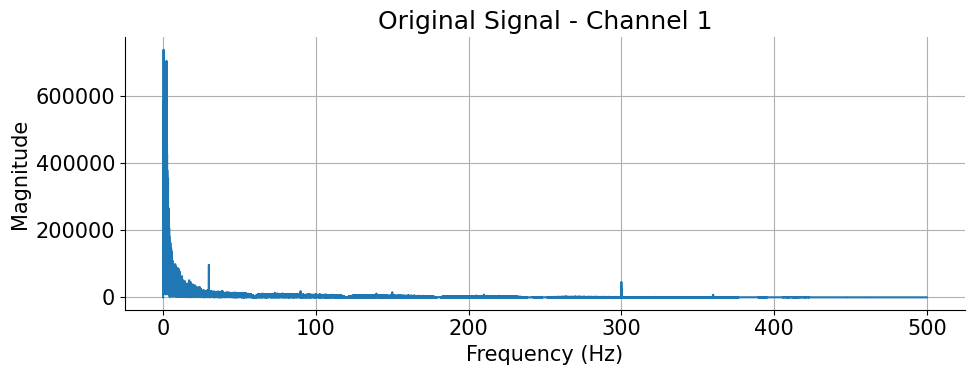

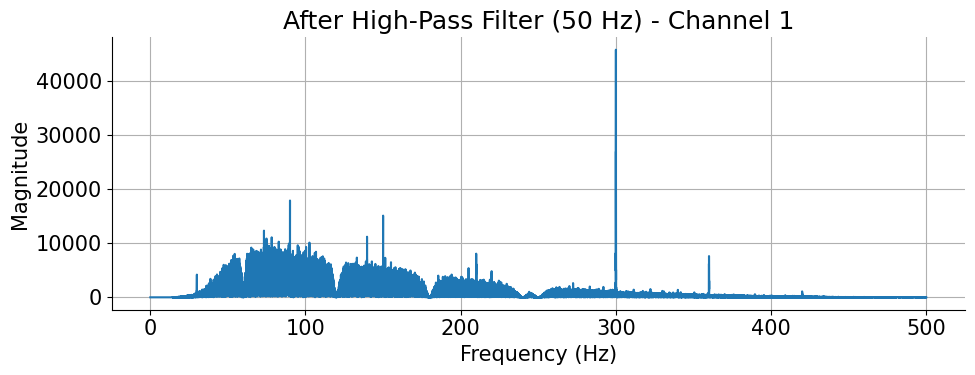

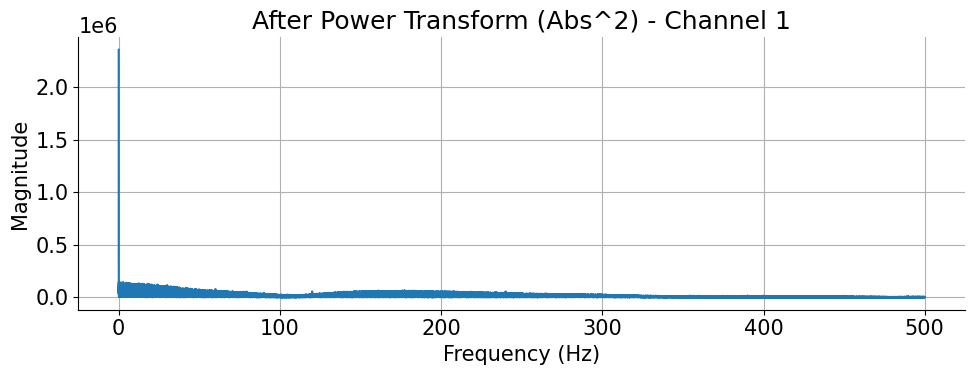

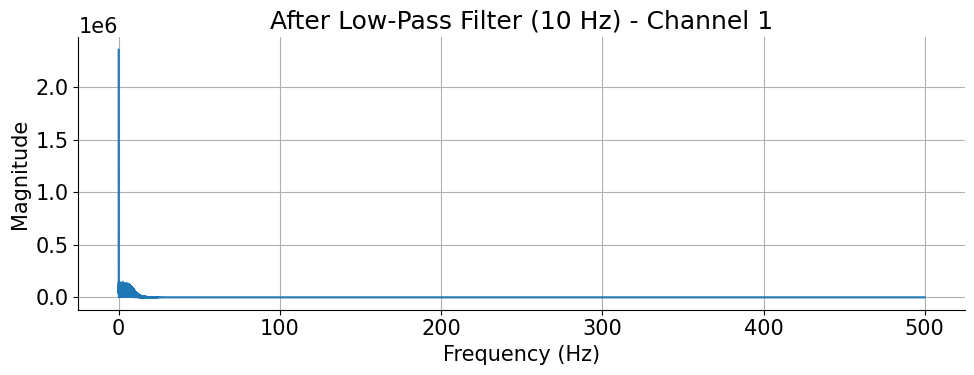

In [13]:

def plot_fft(V, fs=1000, title=""):
    # Check if V is 2D (multi-channel)
    if V.ndim > 1:
        for i in range(1):  # Loop over each channel
            # Compute the FFT for the i-th channel
            N = len(V[:, i])
            f = np.fft.rfftfreq(N, 1/fs)
            V_fft = np.fft.rfft(V[:, i])
            magnitude = np.abs(V_fft)

            # Plot for each channel
            plt.figure(figsize=(10, 4))
            plt.plot(f, magnitude)
            plt.title(f"{title} - Channel {i+1}")
            plt.xlabel("Frequency (Hz)")
            plt.ylabel("Magnitude")
            plt.grid(True)
            plt.tight_layout()
            plt.show()
    else:
        # Compute FFT for single-channel signal
        N = len(V)
        f = np.fft.rfftfreq(N, 1/fs)
        V_fft = np.fft.rfft(V)
        magnitude = np.abs(V_fft)

        # Plot for the single signal
        plt.figure(figsize=(10, 4))
        plt.plot(f, magnitude)
        plt.title(f"Frequency Spectrum {title}")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Magnitude")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Assuming dat1 is already defined and contains 'V' and 'scale_uv'

# Step 1: Scale the signal
V = dat1['V'].astype('float32') * dat1["scale_uv"]
plot_fft(V, title="Original Signal")

# Step 2: High-pass filter at 50 Hz
b, a = signal.butter(3, [50], btype='high', fs=1000)
V = signal.filtfilt(b, a, V, 0)
plot_fft(V, title="After High-Pass Filter (50 Hz)")

# Step 3: Power transformation
V = np.abs(V)**2
plot_fft(V, title="After Power Transform (Abs^2)")

# Step 4: Low-pass filter at 10 Hz
b, a = signal.butter(3, [10], btype='low', fs=1000)
V = signal.filtfilt(b, a, V, 0)
plot_fft(V, title="After Low-Pass Filter (10 Hz)")

# Step 5: Normalize
V = V / V.mean(0)

In [20]:
V = dat1['V'].astype('float32') * dat1["scale_uv"]
print(V[1][:])

[ 0.21991592  0.43818691  0.42261764  0.46258254  0.35208678  0.71020244
  0.02242026  0.00323897 -0.43960899 -0.07290448  0.47974938  1.16748947
  0.24881564 -0.27984592  0.03836422  0.04766457 -0.41871308 -0.29894846
  0.24651496  0.05132767  0.46202168  0.26013058  0.12426977  0.07499291
 -0.65107224 -0.10481913  0.0214048   0.16436064  0.04157635 -0.06084377
 -0.29437612 -0.33404699 -0.14284238 -0.25846935 -0.23531739 -0.24468645
 -0.0949993  -0.37079776 -0.04854296 -0.07497289 -0.20036875 -0.24639339
  0.42293406 -0.05230685 -0.42806058 -0.43355577 -0.71088055 -0.16656921
 -0.70524064 -0.10622581]


ValueError: x and y must have same first dimension, but have shapes (135681,) and (271360, 26)

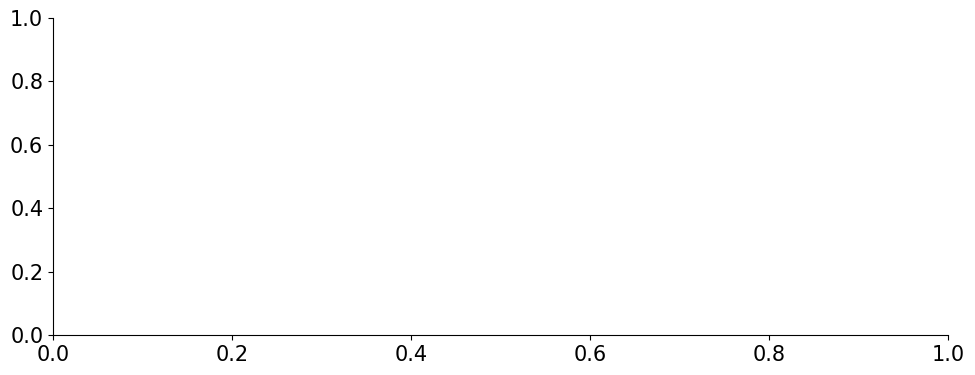

In [11]:
# quick way to get broadband power in time-varying windows


V = dat1['V'].astype('float32') * dat1["scale_uv"]
plot_fft(V, title="Original Signal")
print('....')
b, a = signal.butter(3, [50], btype='high', fs=1000)
V = signal.filtfilt(b, a, V, 0)
plot_fft(V, title="After High-Pass Filter (50 Hz)")
print('....')
V = np.abs(V)**2
plot_fft(V, title="After Power Transform (Abs^2)")
b, a = signal.butter(3, [10], btype='low', fs=1000)
V = signal.filtfilt(b, a, V, 0)
plot_fft(V, title="After Low-Pass Filter (10 Hz)")
print('....')
V = V/V.mean(0)


In [21]:
# average the broadband power across all face stimuli and across all house stimuli

nt, nchan = V.shape
nstim = len(dat1['t_on'])

trange = np.arange(-200, 400)
ts = dat1['t_on'][:, np.newaxis] + trange
V_epochs = np.reshape(V[ts, :], (nstim, 600, nchan))

V_house = (V_epochs[dat1['stim_id'] <= 50]).mean(0)
V_face = (V_epochs[dat1['stim_id'] > 50]).mean(0)

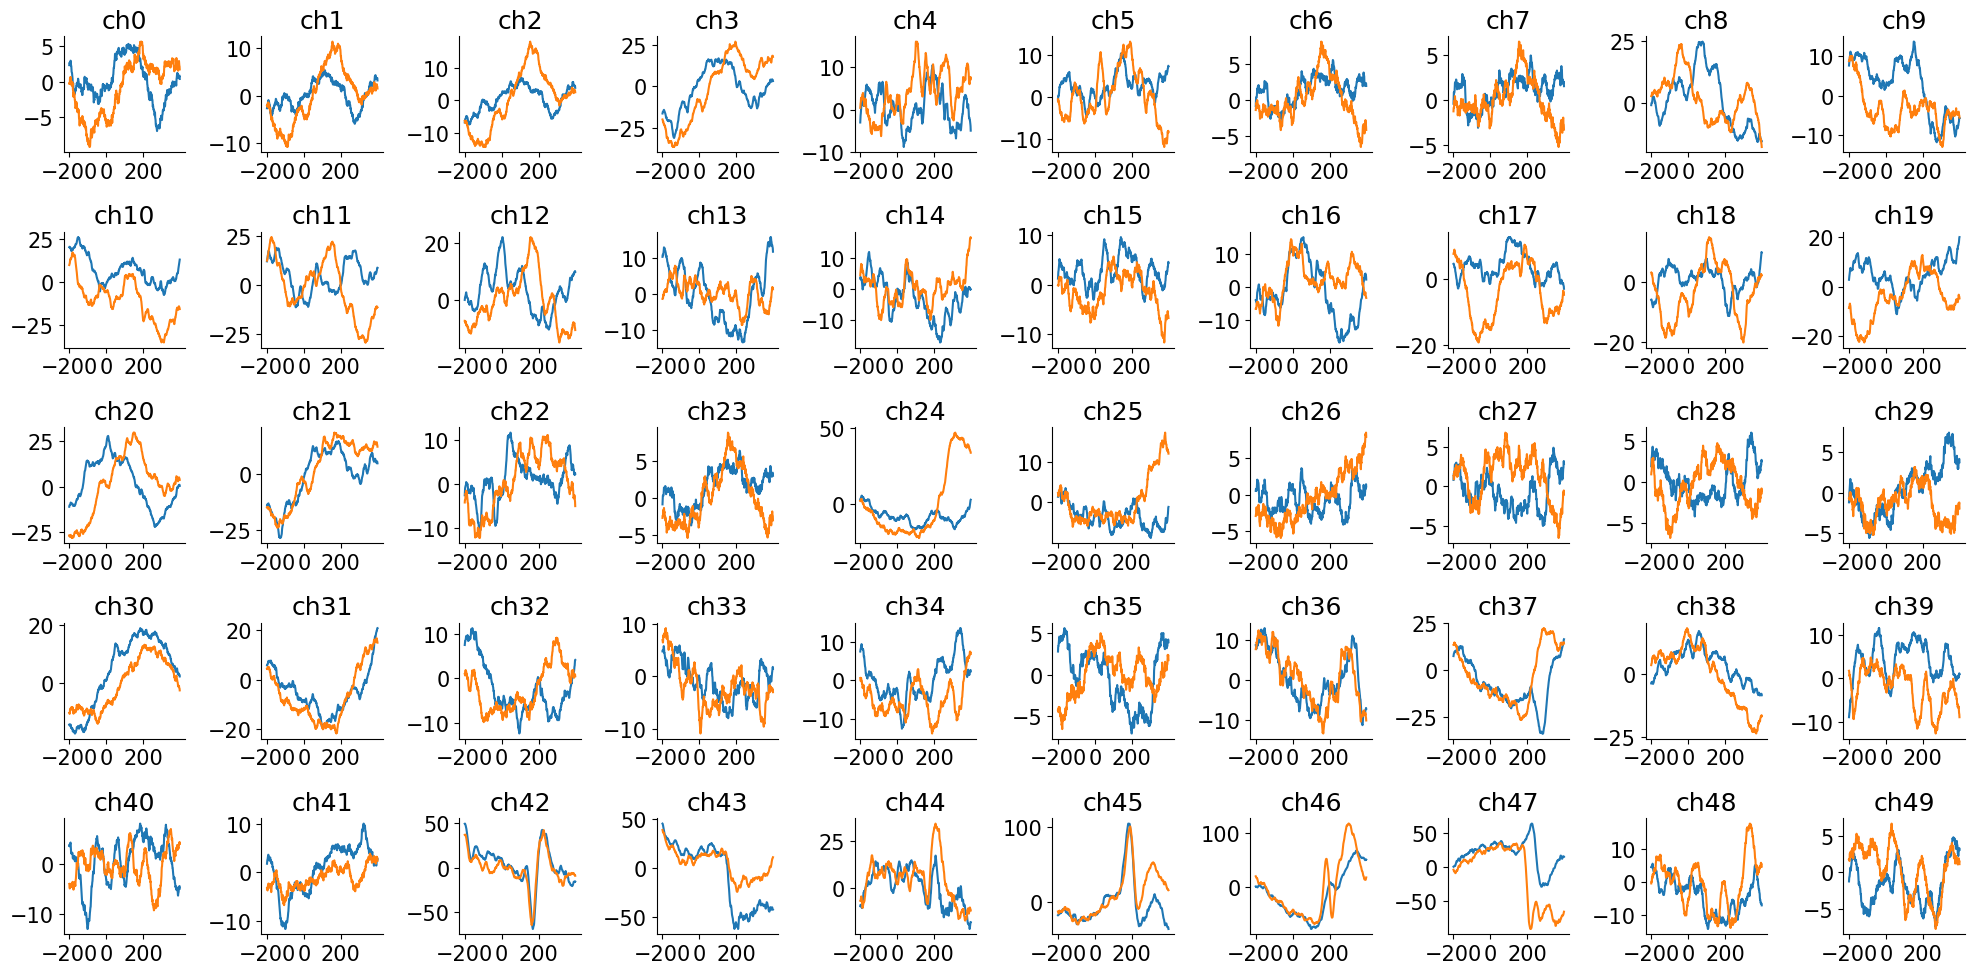

In [22]:
# let's find the electrodes that distinguish faces from houses
plt.figure(figsize=(20, 10))
for j in range(50):
  ax = plt.subplot(5, 10, j+1)
  plt.plot(trange, V_house[:, j])
  plt.plot(trange, V_face[:, j])
  plt.title('ch%d'%j)
  plt.xticks([-200, 0, 200])
  #plt.ylim([0, 4])
plt.show()

In [ ]:
#some complicated code from Louis, need to read
active_areas_face = []
active_areas_house = []
i=6
subject = subjects1[i]
V = subject['V'].astype('float32')

# High-pass filter at 50 Hz
b, a = signal.butter(3, [50], btype='high', fs=1000)
V = signal.filtfilt(b, a, V, axis=0)

# Compute power (rectification and squaring)
V = np.abs(V)**2

# Normalize over full signal (optional)
V /= np.mean(V, axis=0)

# Low-pass filter at 10 Hz
b, a = signal.butter(3, [10], btype='low', fs=1000)
V = signal.filtfilt(b, a, V, axis=0)

nt, nchan = V.shape
nstim = len(subject['t_on'])

# Build epochs around each stimulus onset
trange = np.arange(-200, 400)  # 600 ms window
ts = subject['t_on'][:, np.newaxis] + trange
V_epochs = V[ts, :]  # shape (nstim, 600, nchan)

Subject 0 :
	Face response : Counter({np.str_('Brodmann area 19'): 2, np.str_('Brodmann area 18'): 2})
	9.76% of channels ([29 33 34 35])
	House response : Counter({np.str_('Brodmann area 19'): 2, np.str_('Brodmann area 18'): 2, np.str_('Brodmann area 36'): 1})
	12.20% of channels ([25 29 30 33 34])


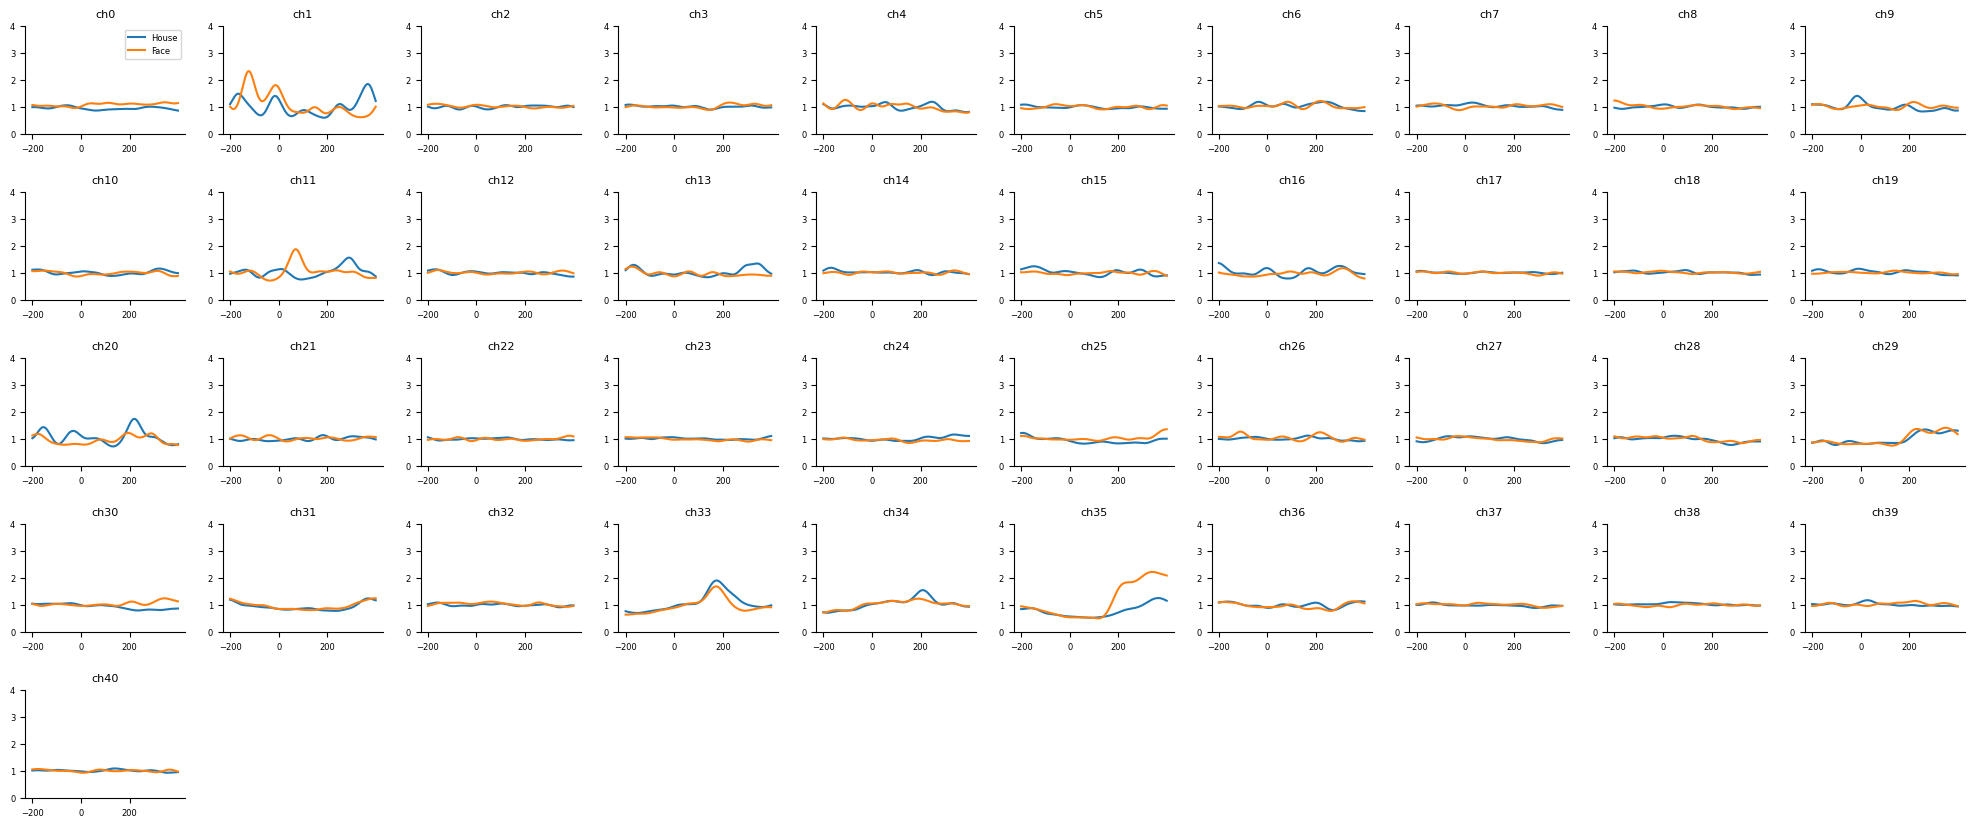

Subject 1 :
	Face response : Counter({np.str_('Brodmann area 18'): 3, np.str_('Brodmann area 28'): 1, np.str_('Brodmann area 19'): 1, np.str_('Brodmann area 37'): 1})
	12.00% of channels ([24 42 43 44 46 47])
	House response : Counter({np.str_('Brodmann area 18'): 3, np.str_('Brodmann area 19'): 2})
	10.00% of channels ([42 43 44 45 46])


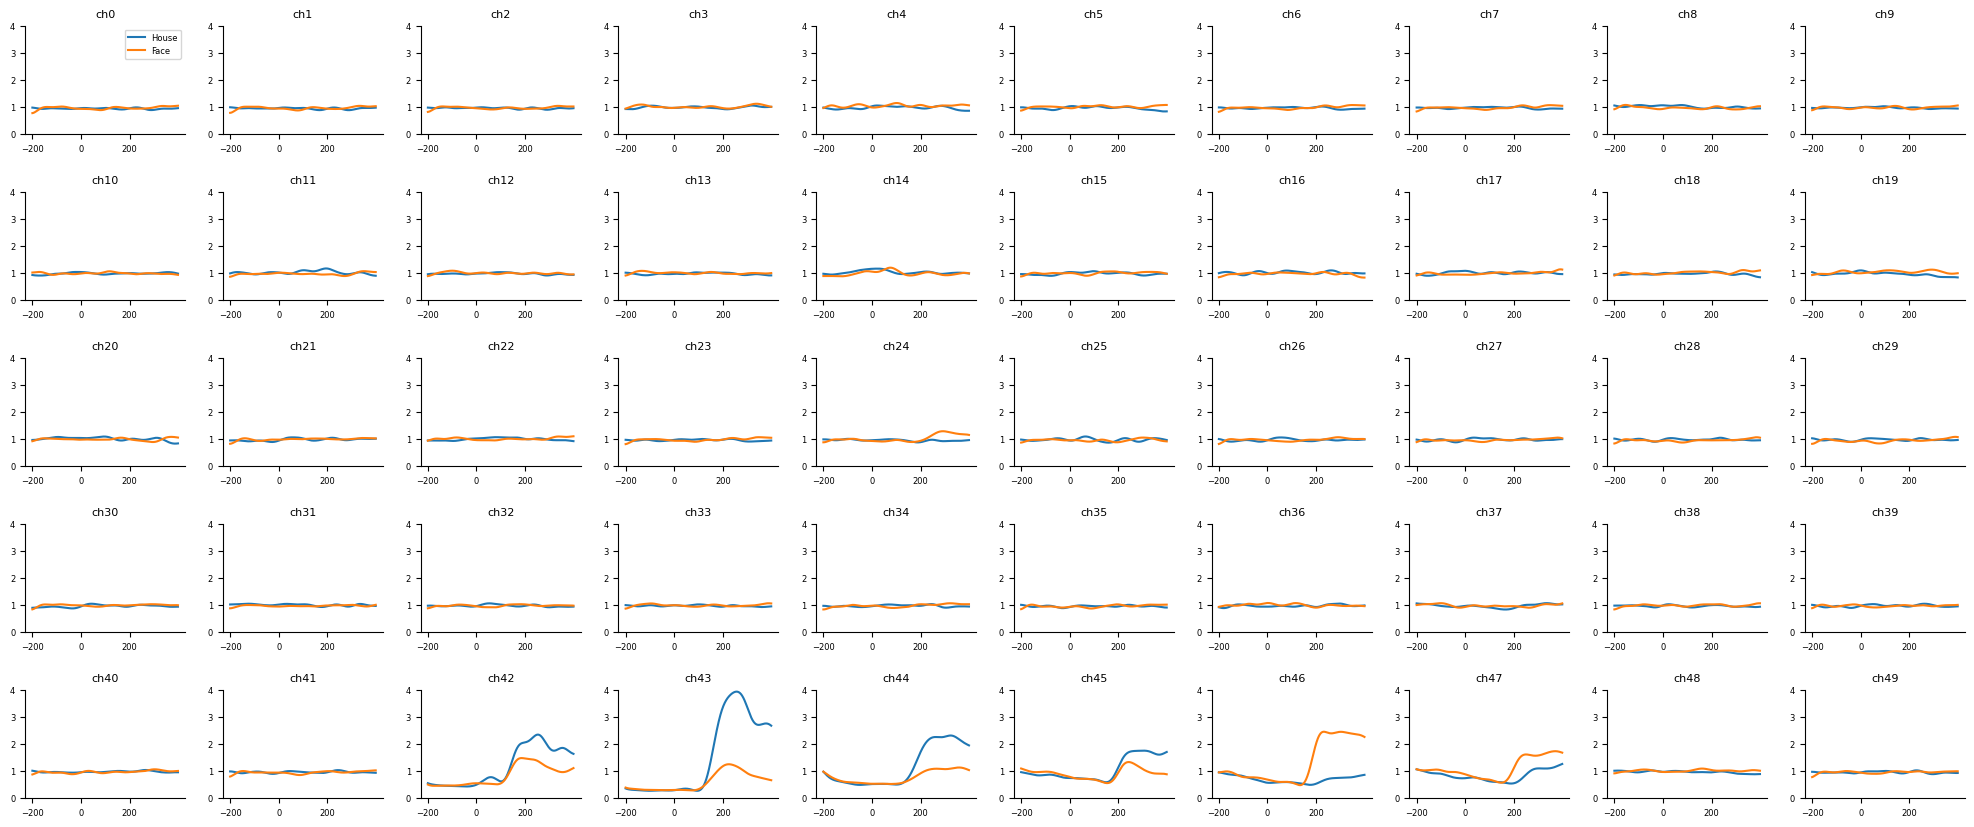

Subject 2 :
	Face response : Counter({np.str_('Dentate'): 3, np.str_('Brodmann area 22'): 3})
	15.38% of channels ([ 7  8  9 33 34 35])
	House response : Counter({np.str_('Dentate'): 5, np.str_('Brodmann area 22'): 3})
	20.51% of channels ([ 6  7  8  9 10 33 34 36])


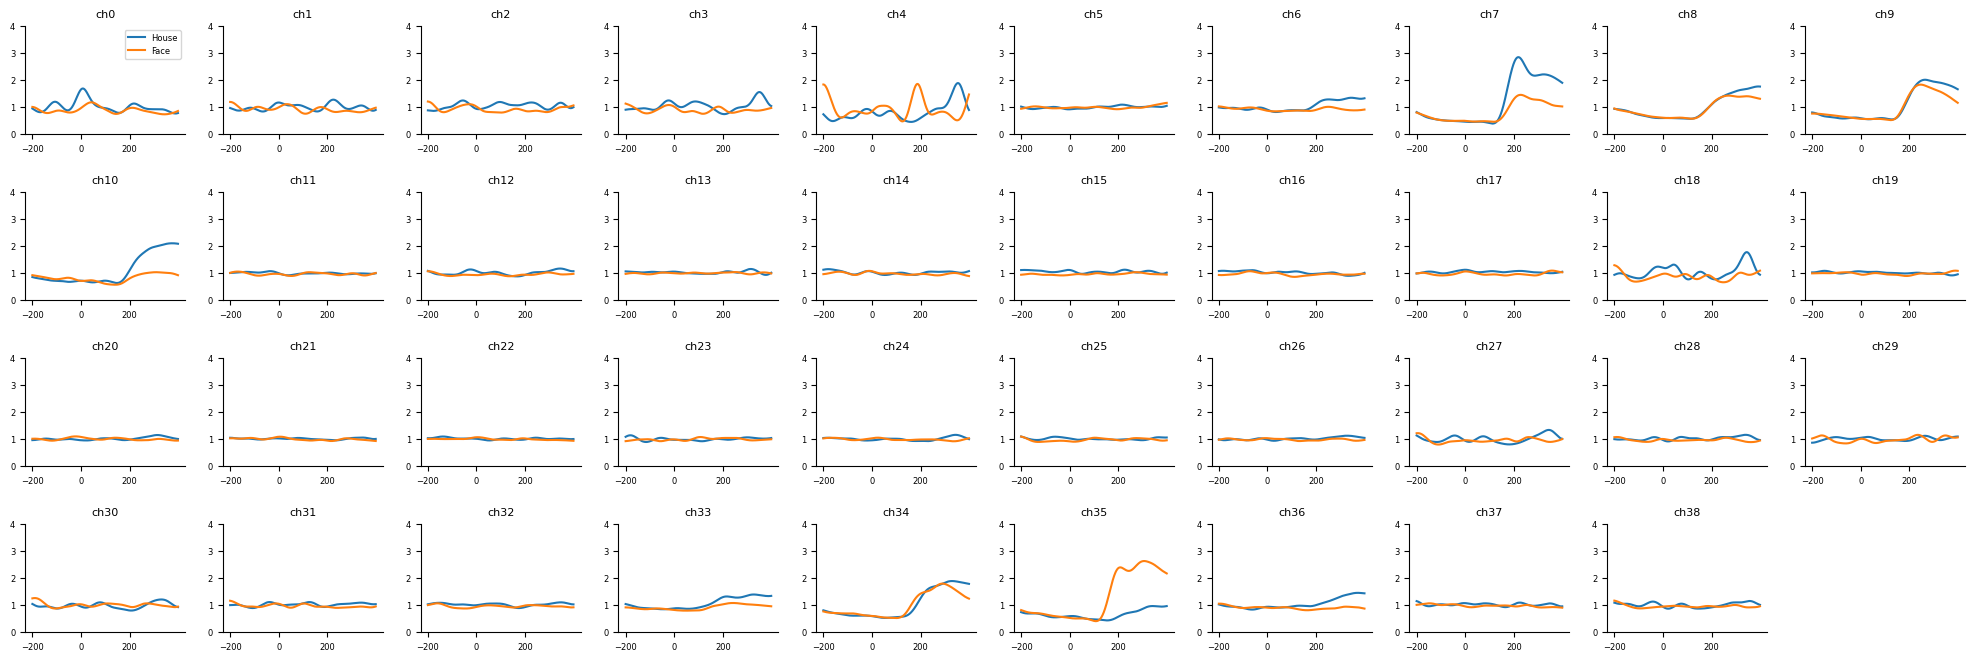

Subject 3 :
	Face response : Counter({np.str_('Brodmann area 19'): 1, np.str_('Brodmann area 37'): 1})
	3.33% of channels ([20 23])
	House response : Counter({np.str_('Brodmann area 19'): 2, np.str_('Brodmann area 37'): 1})
	5.00% of channels ([20 21 23])


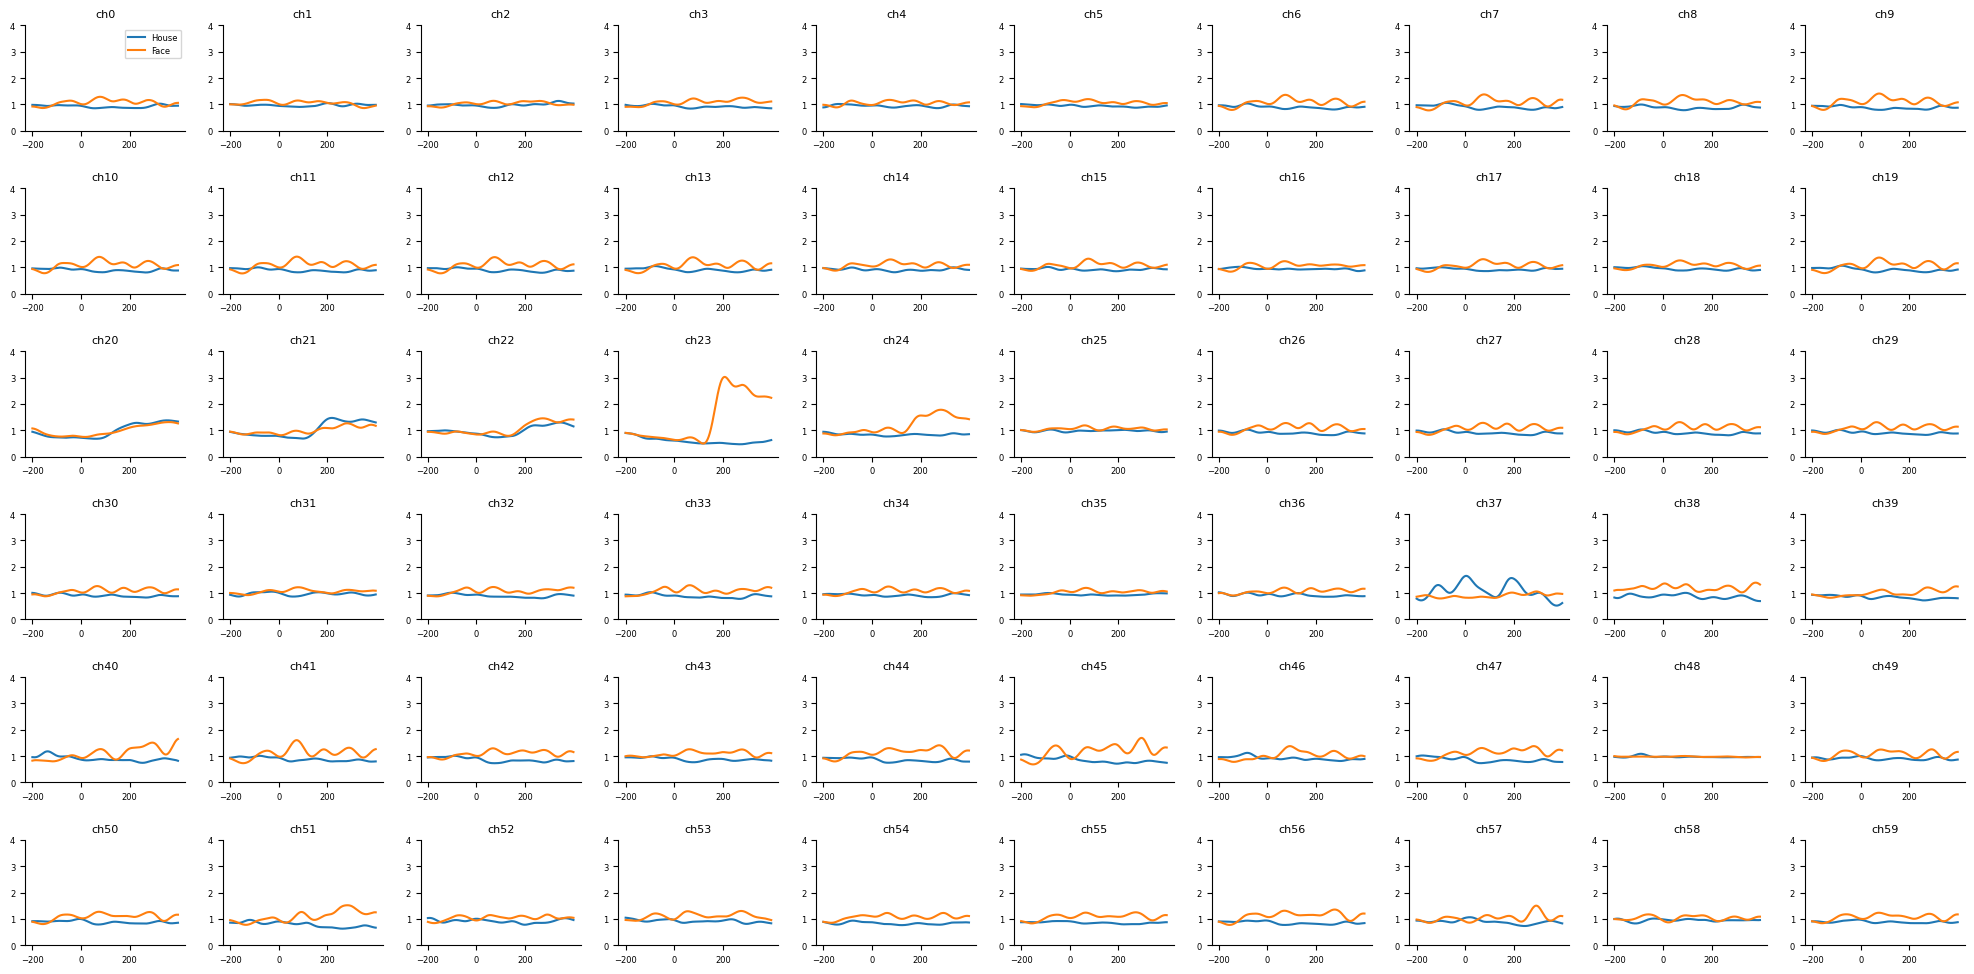

Subject 4 :
	Face response : Counter({np.str_('Brodmann area 19'): 1})
	1.72% of channels ([15])
	House response : Counter({np.str_('Brodmann area 19'): 1})
	1.72% of channels ([14])


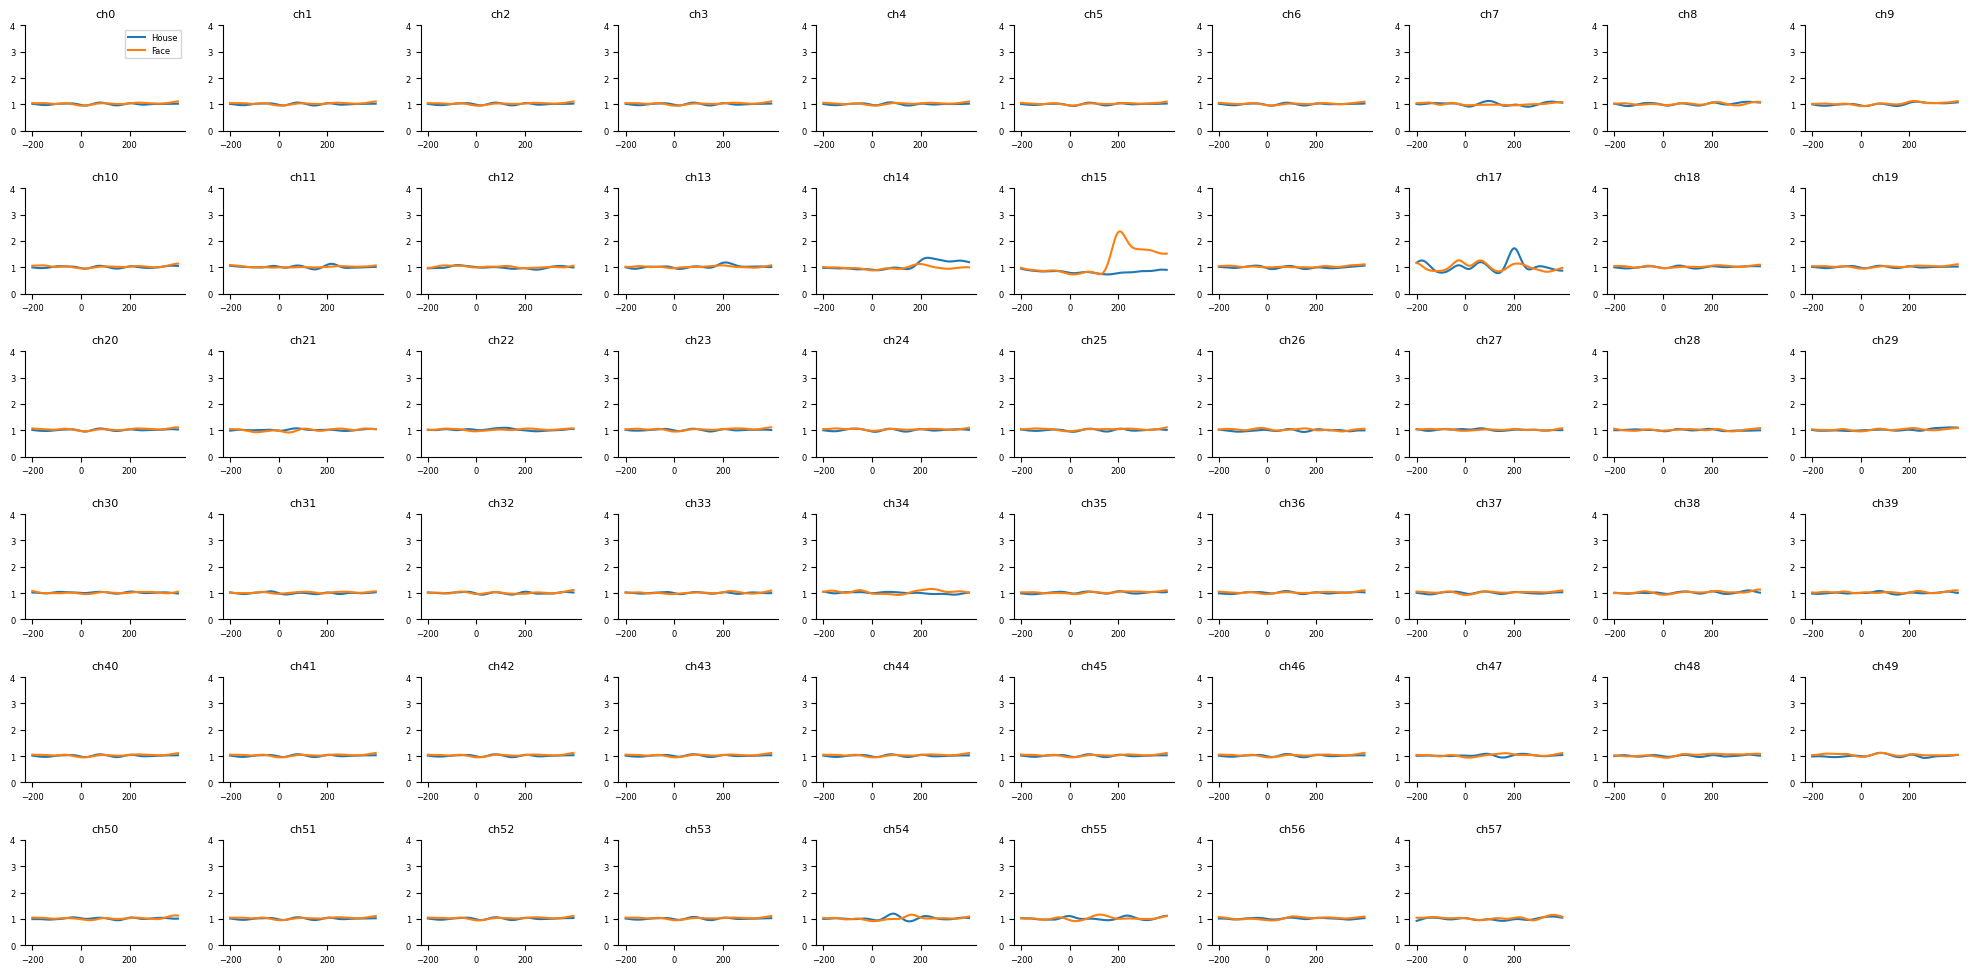

Subject 5 :
	Face response : Counter({np.str_('Brodmann area 18'): 4, np.str_('Brodmann area 37'): 1, np.str_('Brodmann area 17'): 1, np.str_('Brodmann area 19'): 1, np.str_('Brodmann area 30'): 1})
	20.51% of channels ([23 24 25 26 27 28 30 34])
	House response : Counter({np.str_('Brodmann area 18'): 4, np.str_('Brodmann area 17'): 1, np.str_('Brodmann area 19'): 1})
	15.38% of channels ([24 26 27 28 29 30])


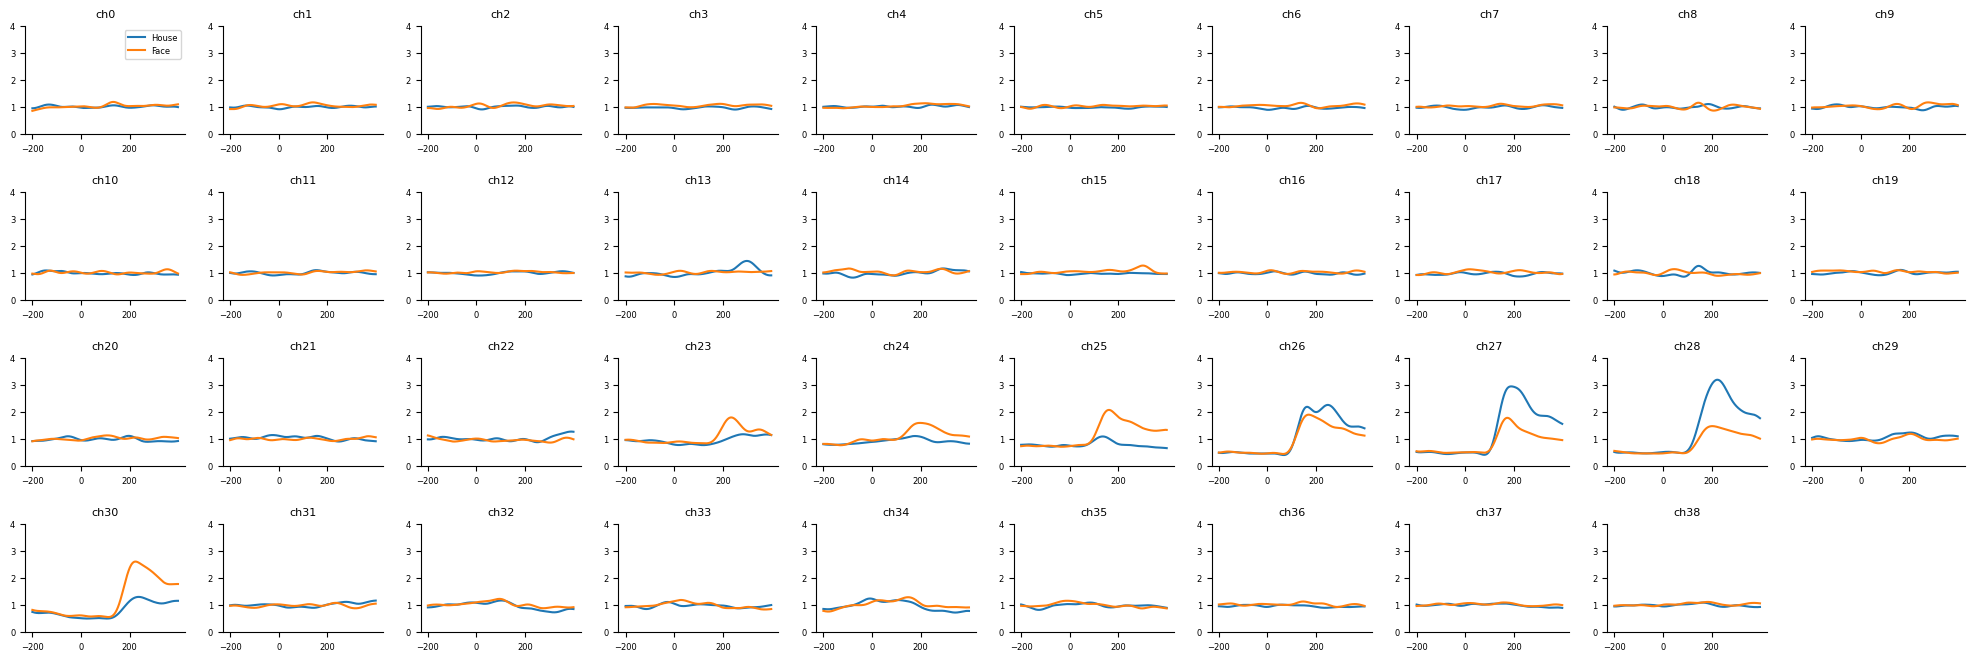

Subject 6 :
	Face response : Counter({np.str_('Brodmann area 19'): 2, np.str_('Brodmann area 37'): 2})
	6.90% of channels ([ 8  9 36 38])
	House response : Counter({np.str_('Brodmann area 19'): 2, np.str_('Brodmann area 37'): 1})
	5.17% of channels ([ 9 36 37])


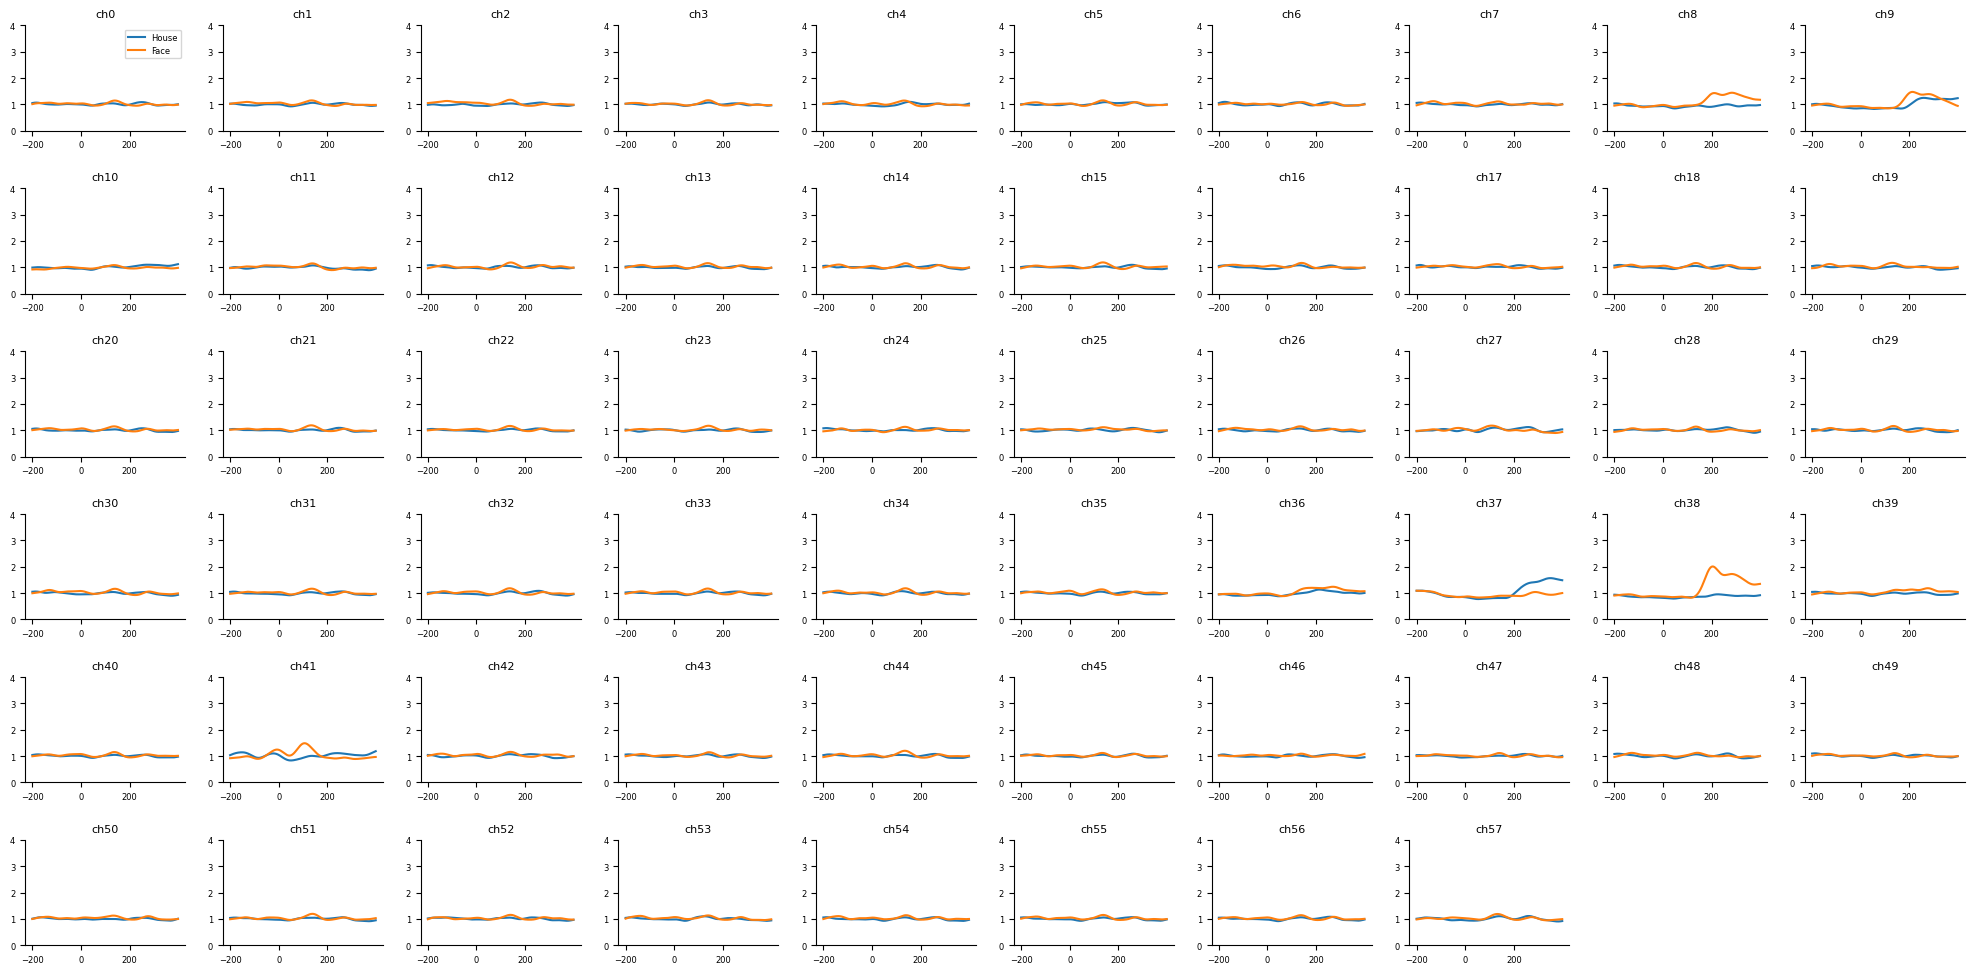

In [23]:

#some complicated code from Louis, need to read
active_areas_face = []
active_areas_house = []
for i, subject in enumerate(subjects1):
    V = subject['V'].astype('float32')* subject["scale_uv"]

    # High-pass filter at 50 Hz
    b, a = signal.butter(3, [50], btype='high', fs=1000)
    V = signal.filtfilt(b, a, V, axis=0)

    # Compute power (rectification and squaring)
    V = np.abs(V)**2

    # Normalize over full signal (optional)
    V /= np.mean(V, axis=0)

    # Low-pass filter at 10 Hz
    b, a = signal.butter(3, [10], btype='low', fs=1000)
    V = signal.filtfilt(b, a, V, axis=0)

    nt, nchan = V.shape
    nstim = len(subject['t_on'])

    # Build epochs around each stimulus onset
    trange = np.arange(-200, 400)  # 600 ms window
    ts = subject['t_on'][:, np.newaxis] + trange
    V_epochs = V[ts, :]  # shape (nstim, 600, nchan)

    # Pre/post slices (indices relative to epoch window)
    pre_idx = slice(0, 200)    # -200 ms to 0 ms
    post_idx = slice(200, 600) # 0 ms to +400 ms

    # Identify face and house trials
    face_trials = subject['stim_id'] > 50
    house_trials = subject['stim_id'] <= 50

    # Extract pre and post stimulus data per trial and channel
    pre_face = V_epochs[face_trials, pre_idx, :]   # shape (n_face_trials, 200, nchan)
    post_face = V_epochs[face_trials, post_idx, :] # shape (n_face_trials, 400, nchan)

    pre_house = V_epochs[house_trials, pre_idx, :]
    post_house = V_epochs[house_trials, post_idx, :]

    # Compute mean power over time window, per trial and channel
    pre_face_mean = pre_face.mean(axis=1)   # shape (n_face_trials, nchan)
    post_face_mean = post_face.mean(axis=1) # shape (n_face_trials, nchan)
    pre_house_mean = pre_house.mean(axis=1)
    post_house_mean = post_house.mean(axis=1)

    # Initialize result arrays
    increase_face = np.zeros(nchan, dtype=bool)
    increase_house = np.zeros(nchan, dtype=bool)

    # For each channel, test if post-stimulus power is significantly different from pre-stimulus power
    for ch in range(nchan):
        if len(pre_face_mean) > 0:
            try:
                #stat_face, pval_face = wilcoxon(post_face_mean[:, ch], pre_face_mean[:, ch])
                stat_face, pval_face = ttest_ind(post_face_mean[:, ch], pre_face_mean[:, ch], equal_var=False)
                increase_face[ch] = pval_face < 0.01
            except ValueError:
                increase_face[ch] = False
        else:
            increase_face[ch] = False

        if len(pre_house_mean) > 0:
            try:
                #stat_house, pval_house = wilcoxon(post_house_mean[:, ch], pre_house_mean[:, ch])
                stat_house, pval_house = ttest_ind(post_house_mean[:, ch], pre_house_mean[:, ch], equal_var=False)
                increase_house[ch] = pval_house < 0.01
            except ValueError:
                increase_house[ch] = False
        else:
            increase_house[ch] = False

    # Get Brodmann areas
    triggered_areas_face = np.array(subject['Brodmann_Area'])[increase_face]
    triggered_areas_house = np.array(subject['Brodmann_Area'])[increase_house]

    counts_face = Counter(triggered_areas_face)
    counts_house = Counter(triggered_areas_house)

    active_areas_face.append(counts_face)
    active_areas_house.append(counts_house)

    print(f"Subject {i} :")
    print(f"\tFace response : {counts_face}\n\t{len(triggered_areas_face)/nchan:.2%} of channels ({np.arange(nchan)[increase_face]})")
    print(f"\tHouse response : {counts_house}\n\t{len(triggered_areas_house)/nchan:.2%} of channels ({np.arange(nchan)[increase_house]})")


    # Plot average response per channel for faces and houses
    V_house_avg = V_epochs[house_trials].mean(axis=0)  # shape (600, nchan)
    V_face_avg = V_epochs[face_trials].mean(axis=0)

    plt.figure(figsize=(20, 10))
    for j in range(nchan):
        ax = plt.subplot(6, 10, j + 1)
        plt.plot(trange, V_house_avg[:, j], label='House')
        plt.plot(trange, V_face_avg[:, j], label='Face')
        plt.title(f'ch{j}', fontsize=8)
        plt.xticks([-200, 0, 200])
        plt.ylim([0, 4])
        plt.tick_params(labelsize=6)
        if j == 0:
            plt.legend(fontsize=6)
    plt.tight_layout()
    plt.show()


In [35]:
active_areas_face = []
active_areas_house = []
subjects2_kept = [subjects2 [j] for j in [0,3,4,5,6]]
for i, subject in enumerate(subjects2_kept):
    V = subject['V'].astype('float32')* subject["scale_uv"]

    # High-pass filter at 50 Hz
    b, a = signal.butter(3, [50], btype='high', fs=1000)
    V = signal.filtfilt(b, a, V, axis=0)

    # Compute power (rectification and squaring)
    V = np.abs(V)**2

    # Normalize over full signal (optional)
    V /= np.mean(V, axis=0)

    # Low-pass filter at 10 Hz
    b, a = signal.butter(3, [10], btype='low', fs=1000)
    V = signal.filtfilt(b, a, V, axis=0)
    nt, nchan = V.shape



    for noise_level in range(0,5,5):

      house_trials = (subject['stim_cat'] == 1)*(subject['stim_noise'].flatten() == noise_level)
      face_trials = (subject['stim_cat'] == 2)*(subject['stim_noise'].flatten() == noise_level)
      print(house_trials.shape)
      print(subject['stim_cat'].shape)
      # Build epochs around each stimulus onset
      trange = np.arange(-200, 400)  # 600 ms window
      ts = subject['t_on'][:, np.newaxis] + trange
      V_epochs = V[ts, :]  # shape (nstim, 600, nchan)

      # Pre/post slices (indices relative to epoch window)
      pre_idx = slice(0, 200)    # -200 ms to 0 ms
      post_idx = slice(200, 600) # 0 ms to +400 ms

      # Extract pre and post stimulus data per trial and channel
      pre_face = V_epochs[face_trials, pre_idx, :]   # shape (n_face_trials, 200, nchan)
      post_face = V_epochs[face_trials, post_idx, :] # shape (n_face_trials, 400, nchan)

      pre_house = V_epochs[house_trials, pre_idx, :]
      post_house = V_epochs[house_trials, post_idx, :]

      # Compute mean power over time window, per trial and channel
      pre_face_mean = pre_face.mean(axis=1)   # shape (n_face_trials, nchan)
      post_face_mean = post_face.mean(axis=1) # shape (n_face_trials, nchan)
      pre_house_mean = pre_house.mean(axis=1)
      post_house_mean = post_house.mean(axis=1)

      # Initialize result arrays
      increase_face = np.zeros(nchan, dtype=bool)
      increase_house = np.zeros(nchan, dtype=bool)

      # For each channel, test if post-stimulus power is significantly different from pre-stimulus power
      for ch in range(nchan):
          if len(pre_face_mean) > 0:
              try:
                  #stat_face, pval_face = wilcoxon(post_face_mean[:, ch], pre_face_mean[:, ch])
                  stat_face, pval_face = ttest_ind(post_face_mean[:, ch], pre_face_mean[:, ch], equal_var=False)
                  increase_face[ch] = pval_face < 0.01
              except ValueError:
                  increase_face[ch] = False
          else:
              increase_face[ch] = False

          if len(pre_house_mean) > 0:
              try:
                  #stat_house, pval_house = wilcoxon(post_house_mean[:, ch], pre_house_mean[:, ch])
                  stat_house, pval_house = ttest_ind(post_house_mean[:, ch], pre_house_mean[:, ch], equal_var=False)
                  increase_house[ch] = pval_house < 0.01
              except ValueError:
                  increase_house[ch] = False
          else:
              increase_house[ch] = False

      # Get Brodmann areas
      triggered_areas_face = np.array(subject['Brodmann_Area'])[increase_face]
      triggered_areas_house = np.array(subject['Brodmann_Area'])[increase_house]

      counts_face = Counter(triggered_areas_face)
      counts_house = Counter(triggered_areas_house)

      active_areas_face.append(counts_face)
      active_areas_house.append(counts_house)

      print(f"Subject {i} :")
      print(f"\tFace response : {counts_face}\n\t{len(triggered_areas_face)/nchan:.2%} of channels ({np.arange(nchan)[increase_face]})")
      print(f"\tHouse response : {counts_house}\n\t{len(triggered_areas_house)/nchan:.2%} of channels ({np.arange(nchan)[increase_house]})")


      # Plot average response per channel for faces and houses
      V_house_avg = V_epochs[house_trials].mean(axis=0)  # shape (600, nchan)
      V_face_avg = V_epochs[face_trials].mean(axis=0)

      plt.figure(figsize=(20, 10))
      for j in range(nchan):
          ax = plt.subplot(6, 10, j + 1)
          plt.plot(trange, V_house_avg[:, j], label='House')
          plt.plot(trange, V_face_avg[:, j], label='Face')
          plt.title(f'ch{j}', fontsize=8)
          plt.xticks([-200, 0, 200])
          plt.ylim([0, 4])
          plt.tick_params(labelsize=6)
          if j == 0:
              plt.legend(fontsize=6)
      plt.tight_layout()
      plt.show()

(630, 630)
(630, 1)


IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

In [ ]:
for i in range(N_subj):
  print(active_areas_face[i] )

Counter({np.str_('Brodmann area 19'): 2, np.str_('Brodmann area 18'): 2})
Counter({np.str_('Brodmann area 18'): 3, np.str_('Brodmann area 28'): 1, np.str_('Brodmann area 19'): 1, np.str_('Brodmann area 37'): 1})
Counter({np.str_('Dentate'): 3, np.str_('Brodmann area 22'): 3})
Counter({np.str_('Brodmann area 19'): 1, np.str_('Brodmann area 37'): 1})
Counter({np.str_('Brodmann area 19'): 1})
Counter({np.str_('Brodmann area 18'): 4, np.str_('Brodmann area 37'): 1, np.str_('Brodmann area 17'): 1, np.str_('Brodmann area 19'): 1, np.str_('Brodmann area 30'): 1})
Counter({np.str_('Brodmann area 19'): 2, np.str_('Brodmann area 37'): 2})


In [ ]:

all_areas = []
for subject in subjects1:
  for area in subject['Brodmann_Area']:
    if area not in all_areas:
      all_areas.append(area)
N_areas = len(all_areas)
activation_matrix_face = np.zeros((N_subj, N_areas))
for subject_idx in range(N_subj):
  for area_idx, area in enumerate(all_areas):
    if area in list(active_areas_face[subject_idx].keys()):
      activation_matrix_face[subject_idx, area_idx] = active_areas_face[subject_idx][area]

activation_matrix_house = np.zeros((N_subj, N_areas))
for subject_idx in range(N_subj):
  for area_idx, area in enumerate(all_areas):
    if area in list(active_areas_house[subject_idx].keys()):
      activation_matrix_house[subject_idx, area_idx] = active_areas_house[subject_idx][area]

present_areas_matrix = np.zeros((N_subj, N_areas))
for subject_idx, subject in enumerate(subjects1):
  for area_idx, area in enumerate(all_areas):
    if area in subject['Brodmann_Area']:
      present_areas_matrix[subject_idx, area_idx] += 1



In [ ]:


def show_activation_matrix(activation_matrix, present_areas_matrix, title="Activation Matrix", width=3):
    fig, ax = plt.subplots(figsize=(len(all_areas) * 0.5 + 4, N_subj * 0.4 + 2))

    # Plot activation matrix
    im = ax.imshow(activation_matrix, cmap='viridis', aspect='auto')

    # Overlay red cells with rectangle + cross for non-recorded areas
    for i in range(present_areas_matrix.shape[0]):
        for j in range(present_areas_matrix.shape[1]):
            if present_areas_matrix[i, j] == 0:
                # Red rectangle
                rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, linewidth=width,
                                     edgecolor='red', facecolor='none')
                ax.add_patch(rect)

                # Red cross
                ax.plot([j - 0.5, j + 0.5], [i - 0.5, i + 0.5], color='red', linewidth=width / 2)
                ax.plot([j - 0.5, j + 0.5], [i + 0.5, i - 0.5], color='red', linewidth=width / 2)

    print(present_areas_matrix.shape)
    electrodes_per_area = np.sum(present_areas_matrix, axis=0)
    print(electrodes_per_area.shape)

    # Set top x-ticks as area labels (rotated 45°)
    ax.set_xticks(np.arange(len(all_areas)))
    ax.set_xticklabels(all_areas, rotation=45, ha='left')
    ax.xaxis.set_label_position('top')
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

    # Set y-ticks
    ax.set_yticks(np.arange(N_subj))
    ax.set_yticklabels([f"Subj {i}" for i in range(N_subj)])

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label("Number of\ntriggered electrodes")

    # Add secondary x-axis at the bottom for column sums (rotated 90°)
    ax2 = ax.secondary_xaxis('bottom')
    col_sums = activation_matrix.sum(axis=0)
    ax2.set_xticks(np.arange(len(all_areas)))
    ax2.set_xticklabels([f"{int(s)}/{int(electrodes_per_area[i])}" for i,s in enumerate(col_sums)], rotation=90, va='top')
    ax2.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)
    ax2.set_xlabel("Sum over subjects")

    # Add title
    plt.title(title + " (Subjects × Brodmann Areas)", pad=20)
    plt.tight_layout()
    plt.show()


(7, 35)
(35,)


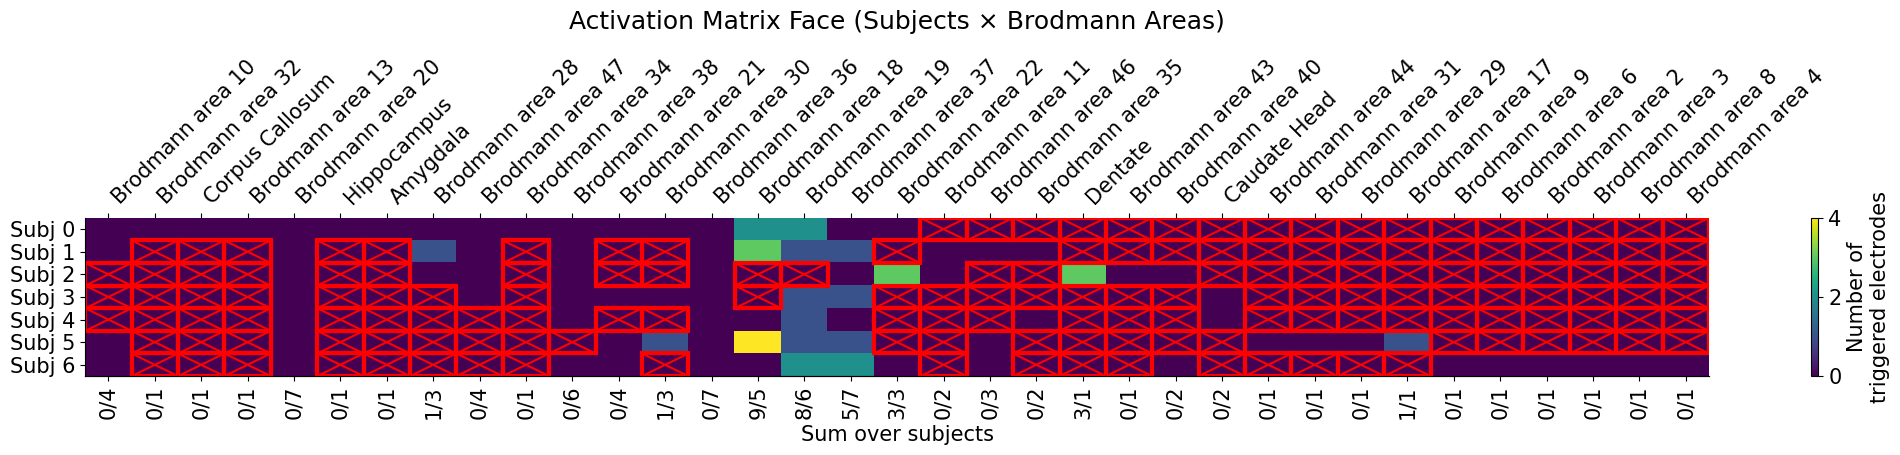

(7, 35)
(35,)


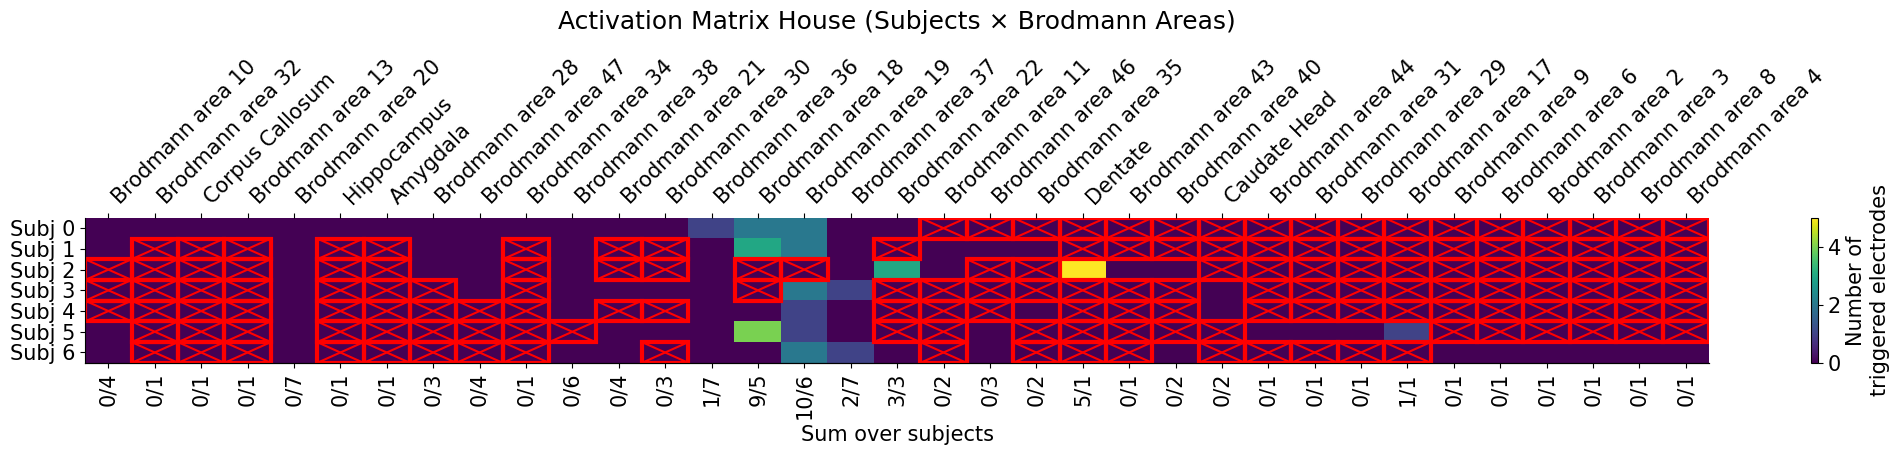

In [ ]:
show_activation_matrix(activation_matrix_face, present_areas_matrix, "Activation Matrix Face")
show_activation_matrix(activation_matrix_house, present_areas_matrix, "Activation Matrix House")

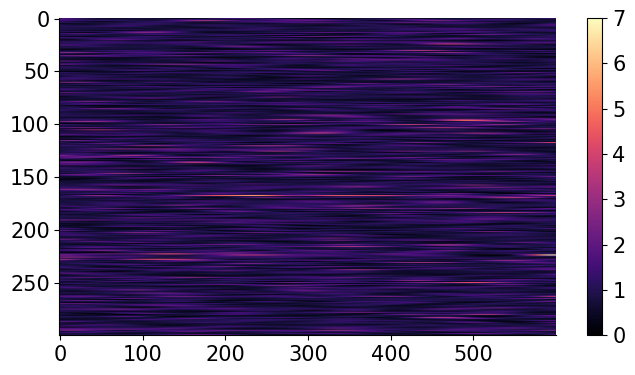

In [ ]:
# let's look at all the face trials for electrode 46 that has a good response to faces
# we will sort trials by stimulus id (1-50 is houses, 51-100 is faces)
plt.subplot(1, 3, 1)
isort = np.argsort(dat1['stim_id'])
plt.imshow(V_epochs[isort, :, 46].astype('float32'),
           aspect='auto', vmax=7, vmin=0,
           cmap='magma')
plt.colorbar()
plt.show()

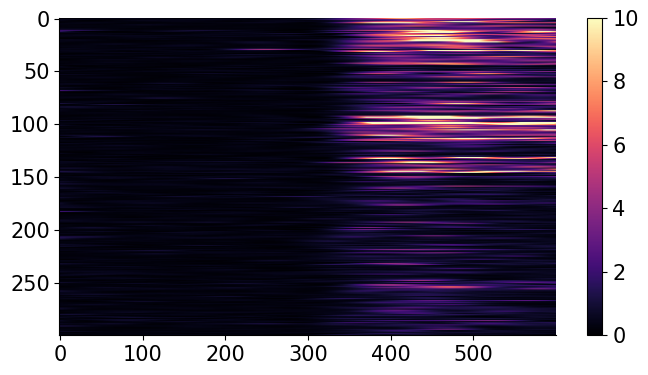

In [ ]:
# Electrode 43 seems to respond to houses
isort = np.argsort(dat1['stim_id'])
plt.subplot(1, 3, 1)
plt.imshow(V_epochs[isort, :, 43].astype('float32'),
           aspect='auto', vmax=10, vmin=0,
           cmap='magma')
plt.colorbar()
plt.show()